**Preprocessing our data:**
We make sure data is prepared for training and testing.
Modality Specific Preprocessing: This step depends on the type of imaging modality (e.g., MRI, CT). Each modality might require different types of noise reduction, artifact correction, or contrast adjustment. For MRI, you might use tools like dcm2nii for converting DICOM files into NIFTI format, which is common in neuroscience research.

Orientation: Ensuring consistent orientation is crucial. Using nibabel, you can standardize the orientation of all images to a common space (e.g., RAS - Right, Anterior, Superior).

Spatial Resampling and Resizing: Resampling may be necessary to ensure all images have the same voxel resolution, which is critical for comparing images across different subjects. You can use nibabel along with scipy.ndimage for these tasks.

Intensity Normalization and Standardization: Normalizing or standardizing the intensity values across different scans helps to reduce variability between images due to differences in machine calibration or patient demographics. This can be done using basic NumPy operations to scale intensity values.

Conversion to Algorithm Input Format: If your model requires a specific format, you’ll need to convert the preprocessed data into that format. For neural networks, this might involve converting data into tensors using libraries like TensorFlow or PyTorch.

Now we will look into how to handle 3D medical image data and how to preprocess it.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%matplotlib notebook
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

This line uses nib.load() to open and read the MRI data file specified by the path. The file format here is likely NIFTI (.nii.gz), a popular format for storing MRI data. The function returns a Nifti1Image object which contains the MRI data along with metadata such as the header and affine transformation matrix that maps voxel indices to coordinates in a reference space.

In [7]:
brain_mri=nib.load('/content/drive/MyDrive/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/03-Preprocessing/IXI662-Guys-1120-T1.nii.gz')
brain_mri_data = brain_mri.get_fdata()

In [10]:
affine=brain_mri.affine
shape=brain_mri.shape

The first three columns in each row are responsible for rotation, scaling, and shearing.
The last column represents translation (in mm), indicating how much the image is shifted from the origin in the x, y, and z directions.

In [11]:
print(affine)

[[ 1.89821944e-02 -2.72075552e-03  1.19975281e+00 -9.06798553e+01]
 [-9.27821696e-01  1.32986516e-01  2.45456006e-02  1.02829445e+02]
 [ 1.33014351e-01  9.28015888e-01  5.71511449e-11 -1.14823784e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [12]:
shape

(256, 256, 150)

A voxel, or volumetric pixel, is a fundamental unit of representation in three-dimensional imaging, commonly used in medical imaging, 3D modeling, and computer graphics. It's analogous to a pixel in 2D images but extends the concept into three dimensions. Here’s a more detailed explanation of a voxel:

Definition and Function
Basic Unit: Just as a pixel represents the smallest discrete element of an image in two dimensions, a voxel represents the smallest discrete element of a volumetric space in three dimensions.
Properties: Each voxel has a specific location in 3D space and contains value(s) that typically represent some characteristic of the data at that point, such as density, color, or intensity. In medical imaging, this intensity might reflect different tissue properties in an MRI or CT scan.

This function retrieves the voxel dimensions of the MRI data. It returns a tuple representing the size of each voxel in the respective dimensions (usually in millimeters). In your output (0.9375, 0.9375, 1.20000039), it indicates that:

Each voxel in the x and y dimensions measures 0.9375 mm.
Each voxel in the z dimension (often corresponding to the slice thickness in MRI scans) measures approximately 1.20000039 mm.

In [14]:
brain_mri.header.get_zooms()


(0.9375, 0.9375, 1.2000039)

Depending on the orientation of the scan the axis changes.You can find out the orientation here, where you pass the affine matrix. These letters always indicate the end of the body axis. The letter P shows that the first axis moves from anterior to posterior (front to back). S moves from inferior to superior (bottom to top) and R moves from left to right.

In [15]:
nib.aff2axcodes(affine)

('P', 'S', 'R')


In the context of medical imaging, particularly MRI (Magnetic Resonance Imaging), "slices" refer to thin cross-sections of the body (or specific organ like the brain) that are imaged and displayed as two-dimensional pictures. These slices are like serial sections that can be viewed sequentially to explore the internal anatomy of the body in detail. Each slice is a capture of a thin segment of the body, and when these slices are put together, they provide a comprehensive 3D image.

Orientation Explained:
Anterior to Posterior (P): This orientation describes movement from the front of the body to the back.
Inferior to Superior (S): This represents movement from the lower part of the body towards the upper part.
Left to Right (R): Indicates the direction from the left side of the body to the right side.
Practical Implications:
Understanding these orientations is crucial for accurately interpreting medical images:

Coronal View (P): Often referred to as the frontal plane, it divides the body into front and back halves.
Axial View (S): Also known as the transverse plane, it divides the body into upper and lower halves.
Sagittal View (R): Divides the body into left and right halves.

Top Image Pair (Slice 40 and Slice 120):

Slice 40: This is a coronal slice positioned more posteriorly, near the middle of the brain, showing structures like the hippocampus, ventricles, and parts of the cerebellum.
Slice 120: An axial slice that cuts through near the top of the brain, showcasing the cerebral cortex, ventricles, and the corpus callosum. It provides a good view of the brain’s symmetry and the separation between the two hemispheres.
Bottom Image Pair (Slice 30 and Slice 200):

Slice 30: Another coronal slice but positioned slightly more anterior than Slice 40. It shows more of the frontal lobes, illustrating regions involved in higher cognitive functions and the frontal part of the lateral ventricles.
Slice 200: A sagittal slice, presenting a side view of the brain. This slice is particularly useful for viewing the brain’s midline structures, such as the corpus callosum, cerebellum, and brainstem. It also effectively shows the cerebrum's curvature.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

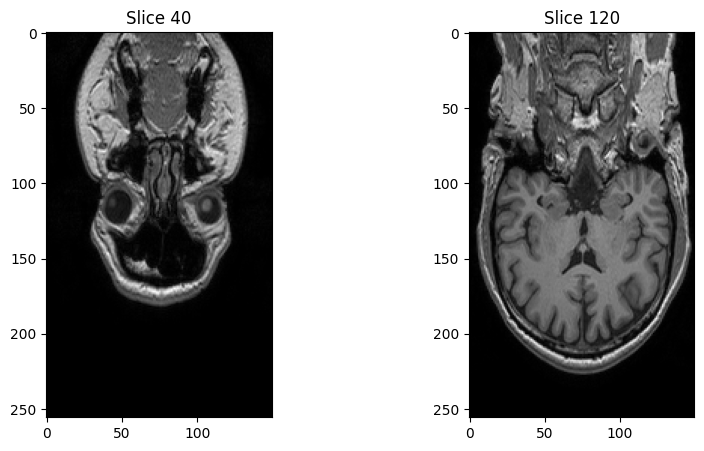

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(brain_mri_data[40, :, :], cmap='gray')
axis[0].set_title('Slice 40')

axis[1].imshow(brain_mri_data[120, :, :], cmap='gray')
axis[1].set_title('Slice 120')

plt.show()


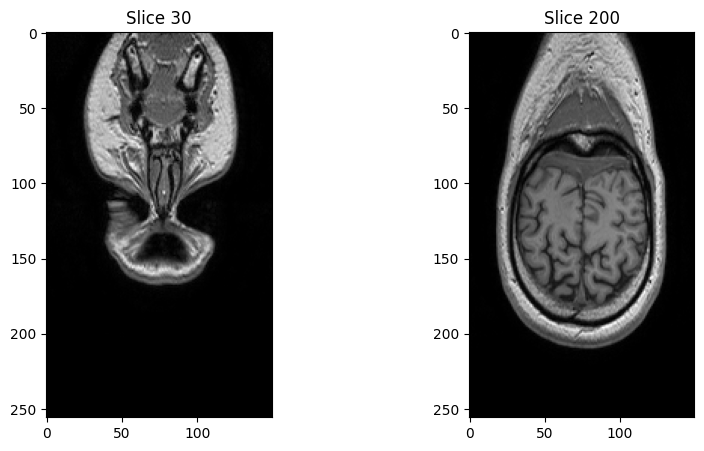

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(brain_mri_data[30, :, :], cmap='gray')
axis[0].set_title('Slice 30')

axis[1].imshow(brain_mri_data[200, :, :], cmap='gray')
axis[1].set_title('Slice 200')

plt.show()


Why is the head rotated? The reason is that first axis of this scan moves from front to back.

Slice 20
Orientation: Sagittal
Details Displayed: This slice offers a side view of the brain. The image captures the lateral aspect, showing the structure of the brain from one side to the other. It reveals the large cerebrum, part of the cerebellum, and the brain stem. This view is excellent for assessing midline structures, the integrity and development of the corpus callosum, and the overall profile of the brain's hemispheres.
Slice 200
Orientation: Axial
Details Displayed: This slice provides a horizontal view cutting through the upper part of the brain. It offers an excellent visualization of the cerebral cortex, the ventricles, and the corpus callosum. The axial view is pivotal for evaluating the brain's symmetry, identifying lesions or abnormalities such as tumors or areas of infarction, and examining the ventricles for any signs of hydrocephalus or other anomalies.

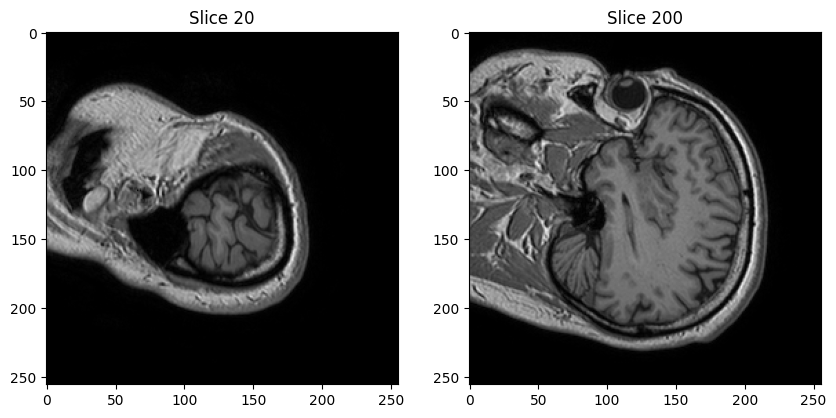

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].imshow(brain_mri_data[:, :,20], cmap='gray')
axis[0].set_title('Slice 20')

axis[1].imshow(brain_mri_data[:, :, 45], cmap='gray')
axis[1].set_title('Slice 200')

plt.show()

The affine matrix should be previously defined and include the scaling, rotation, and translation parameters necessary to convert voxel coordinates to physical coordinates in the MRI scanner's space. This operation transforms the voxel coordinate from the image (voxel) space into the physical space (usually in millimeters).

In [24]:
voxel_coords=np.array((0,0,0,1))
physical_coords=affine@voxel_coords
physical_coords

array([ -90.67985535,  102.82944489, -114.82378387,    1.        ])

The correct understanding and usage of affine transformation matrices are crucial for accurate mapping from voxel to physical space, especially in medical imaging where precise localization affects diagnostic and therapeutic decisions. The translation vector alone can tell you where the origin of the image lies relative to the scanner's coordinate system, which is fundamental for interpreting the images correctly.

In [25]:
affine[:,3:]

array([[ -90.67985535],
       [ 102.82944489],
       [-114.82378387],
       [   1.        ]])

In [26]:
voxel_coords_manual=np.array((0,0,0))
physical_coords_manual=affine[:3,:3]@voxel_coords_manual+affine[:3,3]
physical_coords_manual

array([ -90.67985535,  102.82944489, -114.82378387])

The output indicates that the physical coordinates [-90.67985535, 102.82944489, -114.82378387] map closely back to the origin [0, 0, 0] in voxel space, considering the affine transformation applied. This might be a check to ensure that transformations between these spaces are consistent and correctly implemented, especially in a clinical or research setting where precise spatial calculations are crucial for tasks such as aligning images, comparing scans, or planning surgeries.

In [29]:
physical_coords=[ -90.67985535,  102.82944489, -114.82378387,1.]
(np.linalg.inv(affine) @ physical_coords).round()

array([-0.,  0., -0.,  1.])

# **Resampling**

In [30]:
print(brain_mri.shape)
print(brain_mri.header.get_zooms())

(256, 256, 150)
(0.9375, 0.9375, 1.2000039)


These lines output the original dimensions of the MRI data (256x256x150 voxels) and the size of each voxel (0.9375 mm x 0.9375 mm x 1.2000039 mm), which provide a basis for understanding how densely the spatial data is packed in the image.

In [32]:
import nibabel.processing

This imports the processing module from nibabel, which contains functions for manipulating MRI data, including resampling.



In [40]:
voxel_size=(2,2,2)
brain_mri_resized = nibabel.processing.conform(brain_mri, (128, 128, 100), voxel_size=(2, 2, 2), orientation="PSR")
brain_mri_resized_data=brain_mri_resized.get_fdata()

This line defines the new voxel size (2 mm x 2 mm x 2 mm), which means each voxel will now represent a larger volume of the brain, reducing the resolution but increasing the size of each voxel.
conform: This function resamples the MRI data to a specified shape and voxel size.
(128, 128, 80): The new dimensions of the MRI data, reflecting a reduction in the number of voxels (reducing the resolution).
orientation="PSR": This likely specifies the orientation of the output data, although typically, orientations are denoted by "RAS" (Right-Anterior-Superior) or similar terms in neuroimaging. The specific meaning of "PSR" should be verified in the nibabel documentation as it might relate to specific settings or custom orientations.

In [41]:
print(brain_mri_resized.shape)
print(brain_mri_resized.header.get_zooms())

(128, 128, 100)
(2.0, 2.0, 2.0)


Visual Interpretation and Purpose
Comparative Analysis: The figure allows for direct visual comparison between the original and resized (or processed) versions of the MRI data. This can help in assessing the impact of the resizing process on the data’s quality, details, and overall appearance.
Resampling Effects: The original MRI data is typically of higher resolution, and resizing may involve changing the voxel dimensions, which could affect the clarity and detail visible in the images. By placing the images side by side, you can evaluate how resampling has altered anatomical details, which is important for diagnostic purposes or further image analysis.
Educational and Diagnostic Utility: Such visualizations are useful not only for debugging and methodological verification in research and clinical settings but also for educational purposes to demonstrate the effects of image processing techniques.

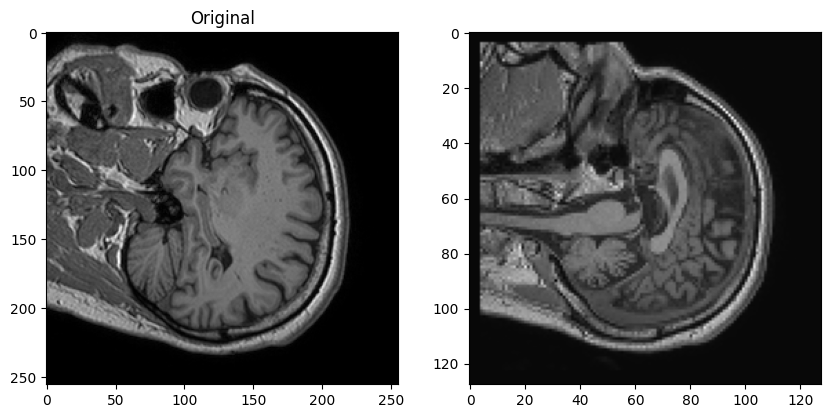

In [42]:
fix,axis=plt.subplots(1,2,figsize=(10,5))
axis[0].imshow(brain_mri_data[:,:,50],cmap='gray')
axis[0].set_title('Original')
axis[1].imshow(brain_mri_resized_data[:,:,50],cmap='gray')

Significance of Resampling
Resampling is critical in medical imaging for several reasons:

Standardization: Adjusting images to a common resolution or voxel size facilitates comparative studies and multi-subject analyses.
Efficiency: Reducing the resolution might be necessary to decrease processing time and data handling requirements for large datasets.
Preparation for Analysis: Certain analysis techniques require data to be in a specific resolution or orientation.



# **Normalization and Standardization**

Understanding Normalization (If Intended)
Normalization in the context of medical imaging typically refers to one of the following processes:

Intensity Normalization: This process involves adjusting the range of pixel intensity values so that they fall within a standard range, usually [0, 1] or [0, 255], depending on the application. This can help in enhancing contrast or standardizing images from different scans for comparative analysis or further image processing tasks.

Standardization: Often involves statistical normalization where the intensity values are scaled such that the resulting distribution has a mean of zero and a standard deviation of one. This can be particularly useful in machine learning models to prevent features with larger scales from dominating the training process.

Why Normalization Might Be Needed (Generally Speaking)
Normalization is crucial in medical imaging for several reasons:

Enhancing Image Quality: Normalization can improve the visibility of important features within the images by adjusting the contrast and brightness.
Comparative Analysis: When comparing images across different patients, sessions, or scanners, normalization ensures that the image data is on a comparable scale.
Pre-processing for Algorithms: Many image processing and machine learning algorithms require data to be normalized to work correctly and efficiently.

In [43]:
lung_ct=nib.load('/content/drive/MyDrive/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/03-Preprocessing/lung_043.nii.gz')
lung_ct_data=lung_ct.get_fdata()


In [44]:
lung_ct_data_standardized=lung_ct_data/3071

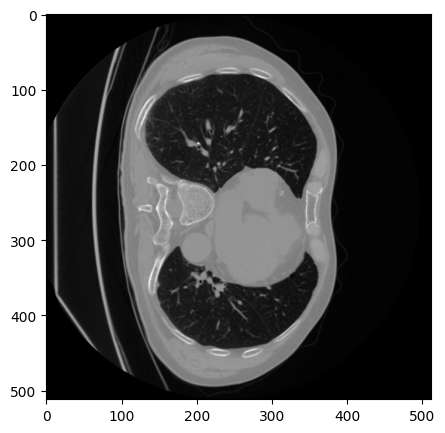

In [50]:
plt.figure(figsize=(10,5))
plt.imshow(lung_ct_data_standardized[:,:,50],cmap='gray')

np.clip(...): This function limits the range of intensity values in the CT data. It is set to keep values between -1000 and -500, which is typical for lung windowing in CT imaging. Values below -1000 are set to -1000, and those above -500 are set to -500. This windowing enhances the contrast of the lung tissues relative to the surrounding structures, making it easier to identify features like the airways, lung parenchyma, and any pathologies.

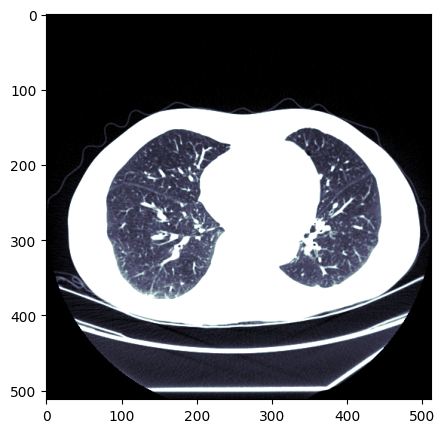

In [54]:
lung_ct_window=np.clip(lung_ct_data,-1000,-500)
plt.figure(figsize=(10,5))
plt.imshow(np.rot90(lung_ct_window[:,:,50]),cmap='bone')


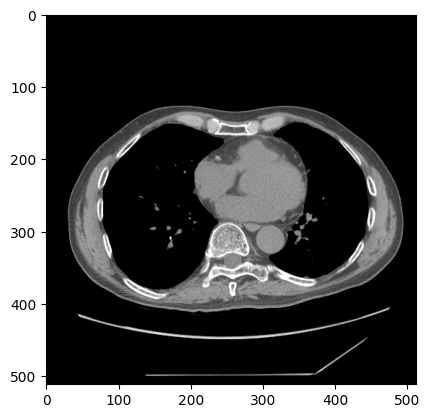

In [55]:
lung_ct_soft_tissue=np.clip(lung_ct_data,-250,250)
plt.figure()
plt.imshow(np.rot90(lung_ct_soft_tissue[:,:,50]),cmap='gray')

nib.load(...): This function loads the MRI data from the specified file path.
get_fdata(): Retrieves the image data as a floating-point numpy array, which is necessary for the precision required in medical image analysis.


In [56]:
cardiac_mri=nib.load('/content/drive/MyDrive/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/03-Preprocessing/la_003.nii.gz')
cardiac_mri_data=cardiac_mri.get_fdata()

These calculations find the mean and standard deviation of the intensity values across the entire MRI dataset, which are used to normalize the data.

In [57]:
mean=np.mean(cardiac_mri_data)
std=np.std(cardiac_mri_data)
cardiac_mri_norm=(cardiac_mri_data-mean)/std
cardiac_mri_standardized=(cardiac_mri_norm-np.min(cardiac_mri_norm))/(np.max(cardiac_mri_norm)-np.min(cardiac_mri_norm)-np.min(cardiac_mri_norm))


Normalization: The data (cardiac_mri_data) is normalized by subtracting the mean and then dividing by the standard deviation. This centers the data around zero and scales it according to its variance.
Standardization: The normalized data is then scaled to a range of 0 to 1. This is done by subtracting the minimum value of the normalized data and dividing by the range of the normalized data. This step is essential for many visualization and machine learning applications because it puts all data on a common scale.

In [58]:
np.mean(cardiac_mri_standardized),np.min(cardiac_mri_standardized),np.max(cardiac_mri_standardized)

(0.07954016225952154, 0.0, 0.9204598377404785)

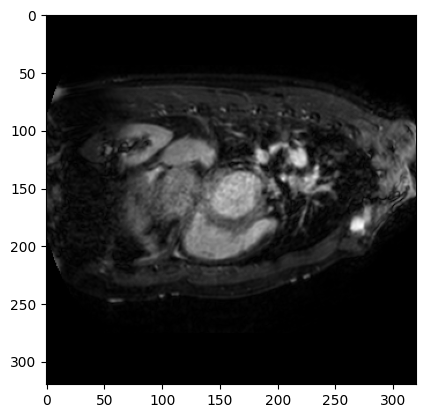

In [61]:
plt.figure()
plt.imshow(cardiac_mri_standardized[:,:,50],cmap='gray')

Purpose and Implications
Enhanced Image Analysis: By normalizing and standardizing the data, differences in tissue response within the MRI scan become more apparent, which is crucial for detecting anomalies, assessing tissue characteristics, and conducting quantitative analysis.
Preparation for Machine Learning: Normalized and standardized data are often prerequisites for machine learning models in medical imaging, as they rely on uniform scales for feature learning.
Improved Visualization: Standardizing the image intensities improves the contrast and visibility of different structures in the images, which aids in diagnostic tasks and educational purposes.